In [1]:
%cd ../data

/home/iseratho/repos/sicss-idea-6/data


In [2]:
import pandas as pd
from transformers import pipeline
import tqdm
tqdm.tqdm.pandas()

In [3]:
model_path_hate = "cardiffnlp/twitter-roberta-base-hate"
model_path_offensive = "cardiffnlp/twitter-roberta-base-offensive"
hate_task = pipeline("sentiment-analysis", model=model_path_hate, tokenizer=model_path_hate)
offensive_task = pipeline("sentiment-analysis", model=model_path_offensive, tokenizer=model_path_offensive)
hate_task("I hate you."), offensive_task("I hate you.")

([{'label': 'LABEL_0', 'score': 0.951102614402771}],
 [{'label': 'LABEL_1', 'score': 0.6861732602119446}])

In [4]:
tweets = pd.read_json("conversations_flat.json", lines=True)
tweets["text"] = tweets["text"].str.replace(r"http\S+", "")
tweets.head()

/tmp/ipykernel_30168/1172537589.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["text"] = tweets["text"].str.replace(r"http\S+", "")


,text,public_metrics,in_reply_to_user_id,reply_settings,created_at,id,source,entities,referenced_tweets,context_annotations,author_id,possibly_sensitive,lang,conversation_id,author,in_reply_to_user,__twarc,attachments,geo,withheld
0,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1194759472087998464,everyone,2020-10-09 12:17:15+00:00,1314540427874308096,Twitter for Android,"{'hashtags': [{'start': 220, 'end': 225, 'tag'...","[{'type': 'replied_to', 'id': '131449302570007...","[{'domain': {'id': '10', 'name': 'Person', 'de...",709375301583835136,False,en,1314477726678614016,{'description': 'Raising awareness for PANS Pa...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
1,@RobinMillarMP @BetsiCadwaladr @healthdpt @NIC...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1194759472087998464,everyone,2020-10-09 11:49:31+00:00,1314533448405614592,Twitter for Android,"{'annotations': [{'start': 136, 'end': 140, 'p...","[{'type': 'replied_to', 'id': '131449302570007...","[{'domain': {'id': '10', 'name': 'Person', 'de...",470801601,False,en,1314477726678614016,{'entities': {'description': {'urls': [{'start...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
2,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",1194759472087998464,everyone,2020-10-09 10:12:43+00:00,1314509086596239360,Twitter for iPhone,"{'annotations': [{'start': 255, 'end': 258, 'p...","[{'type': 'replied_to', 'id': '131449302570007...","[{'domain': {'id': '10', 'name': 'Person', 'de...",816444807371517952,False,en,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...","{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
3,@AlyAShields @BetsiCadwaladr @healthdpt @NICEC...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",470801601,everyone,2020-10-09 09:08:54+00:00,1314493025700077568,Twitter for Android,"{'mentions': [{'start': 0, 'end': 12, 'usernam...","[{'type': 'replied_to', 'id': '131447772937129...","[{'domain': {'id': '10', 'name': 'Person', 'de...",1194759472087998464,False,en,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
4,@BetsiCadwaladr @CALL_247 @MindCymru @Research...,"{'retweet_count': 4, 'reply_count': 1, 'like_c...",470801601,everyone,2020-10-09 08:08:07+00:00,1314477729371299840,Twitter for Android,"{'mentions': [{'start': 0, 'end': 15, 'usernam...","[{'type': 'replied_to', 'id': '131447772667861...","[{'domain': {'id': '10', 'name': 'Person', 'de...",470801601,False,qam,1314477726678614016,{'entities': {'description': {'urls': [{'start...,{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN


In [5]:
def get_hate(x):
    res = hate_task(x)[0]
    label = res['label']
    score = res['score']
    if label == "LABEL_0": # Positive
        return 1 - score
    else: # LABEL_1 = Negative
        return score
    
def get_offensive(x):
    res = offensive_task(x)[0]
    label = res['label']
    score = res['score']
    if label == "LABEL_0": # Positive
        return 1 - score
    else: # LABEL_1 = Negative
        return score

tweets["hate"] = tweets["text"].progress_map(get_hate)
tweets["offensive"] = tweets["text"].progress_map(get_offensive)

100%|███████████████████████████████████████████████████████████████████████████| 52302/52302 [2:02:55<00:00,  7.09it/s]


<AxesSubplot:ylabel='Frequency'>

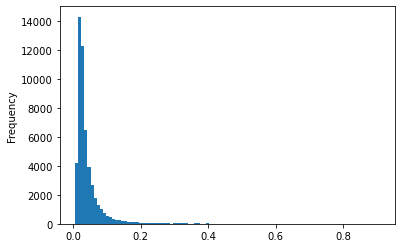

In [6]:
tweets["hate"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

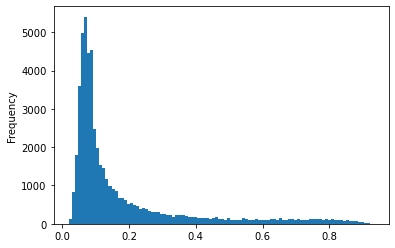

In [7]:
tweets["offensive"].plot.hist(bins=100)

In [8]:
tweets = tweets.set_index("id")
tweets[["hate", "offensive"]].to_csv("tweet_hate_offensive.csv")

In [9]:
# def split_label(x):
#     print(x)
#     if x <= "2020-01-01 00:00:00+00:00":
#         return "before"
#     elif x > "2020-01-01 00:00:00+00:00" and x < "2020-01-01 00:00:00+00:00":
#         return "first_wave"
#     elif x >= "2020-09-01 00:00:00+00:00":
#         return "after_first"

tweets["split"] = "after_first"
tweets.loc[(tweets["created_at"] < "2020-09-01 00:00:00+00:00"), "split"] = "first_wave"
tweets.loc[(tweets["created_at"] < "2020-01-01 00:00:00+00:00"), "split"] = "before"
# tweets["split"] = "N/A"
# tweets["split"] = tweets["created_at"] <= "2020-01-01 00:00:00+00:00"
# tweets["split"] = tweets["created_at"].map(split_label)
tweets["split"].value_counts()

after_first    46964
first_wave      4466
before           872
Name: split, dtype: int64

<AxesSubplot:xlabel='split', ylabel='hate'>

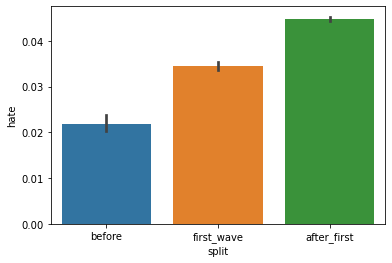

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=tweets, x="split", y="hate", order=["before", "first_wave", "after_first"])

<AxesSubplot:xlabel='split', ylabel='offensive'>

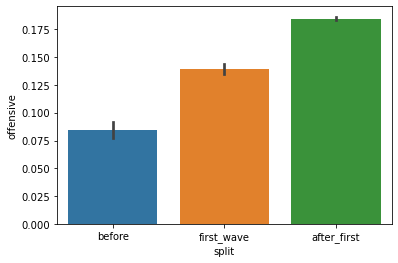

In [11]:
sns.barplot(data=tweets, x="split", y="offensive", order=["before", "first_wave", "after_first"])

<AxesSubplot:xlabel='created_at'>

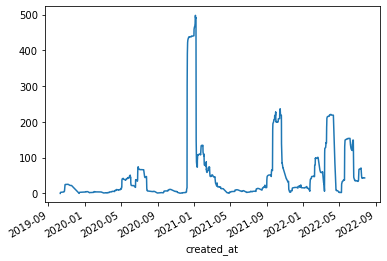

In [12]:
grouped = tweets.set_index("created_at").sort_index().rolling("30D").count().div(30)["text"]
grouped.plot()

<AxesSubplot:xlabel='created_at'>

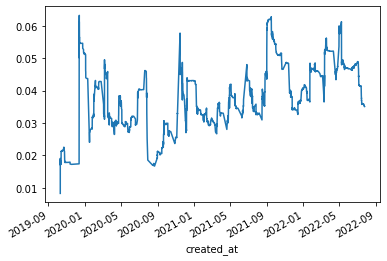

In [15]:
grouped = tweets.set_index("created_at").sort_index().rolling("30D").mean()["hate"]
grouped.plot()

<AxesSubplot:xlabel='created_at'>

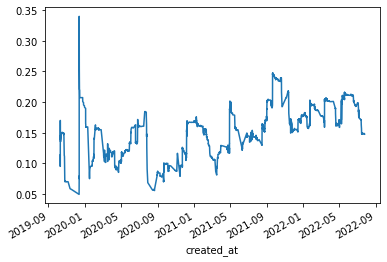

In [14]:
grouped = tweets.set_index("created_at").sort_index().rolling("30D").mean()["offensive"]
grouped.plot()